## Sentiment Analysis on Reviews 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding



In [2]:
amazondata = []
with open("./Amazon_Data.txt") as f: 
    for line in f: 
        line = line.replace("__label__2 ", "positive\t")
        line = line.replace("__label__1 ", "negative\t")
        amazondata.append(line.split("\t"))
       
review_df = pd.DataFrame(amazondata)
review_df.columns = ["sentiment", 'text']

#df.head
review_df = review_df.sample(frac=1, random_state=1)

# test data
test_review_df = review_df[10000:15000]

# train and validation data
review_df = review_df[:10000]
print(review_df.shape)
print(test_review_df.shape)


# test data
review_df.head()
review_df['sentiment'].value_counts()
sentiment_label = review_df.sentiment.factorize()
sentiment_label
review = review_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)




(10000, 2)
(5000, 2)


In [17]:
#process movie data
moviedata = []
with open("./Rateitall_Data.txt") as f: 
    for line in f: 
        moviedata.append(line.split("\t"))
        # re.sub(r"__label_2 ", "positive\t", line)
        # re.sub(r"__label__1", "negative\t", line)
        #break
        
movie_df = pd.DataFrame(moviedata)
movie_df.columns = ["sentiment", 'text']
movie_df = movie_df.sample(frac=1, random_state=1)

test_movie_df = movie_df[10000:]
movie_df = movie_df[:10000]

print(movie_df.shape)
print(test_movie_df.shape)

movie_df.head()
movie_df['sentiment'].value_counts()
sentiment_label = movie_df.sentiment.factorize()
sentiment_label
movie = movie_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(movie)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(movie)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

(10000, 2)
(3864, 2)


In [58]:
#process twitter data
df = pd.read_csv("./Tweet_Data.csv")
df.head()
df.columns
tweet_df = df[['text','airline_sentiment']]
tweet_df.columns = ("text", "sentiment")

tweet_df.head(5)
tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
tweet_df.head(5)
tweet_df = tweet_df.sample(frac=1, random_state=1)
test_tweet_df = tweet_df[10000:]
tweet_df = tweet_df[:10000]
print(tweet_df.shape)
print(test_tweet_df.shape)
tweet_df["sentiment"].value_counts()
sentiment_label = tweet_df.sentiment.factorize()


tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

print(tweet_df.head())

(10000, 2)
(1541, 2)
                                                    text sentiment
11560  @USAirways u guys get too much $$$ and too man...  negative
3512   @united ...she said she would need to get a su...  negative
5742   @southwestair SWEET!!! Glad to hear it. I'll k...  positive
905    @united has made my no fly list. Other airline...  negative
5878   @SouthwestAir CEO Gary Kelly, "We are America'...  positive


In [60]:
#process reddit data
df = pd.read_csv("./Reddit_Data.csv")
df.head()
df.columns
reddit_df = df[['clean_comment','category']]
# print(reddit_df.shape)
reddit_df.head(5)
reddit_df = reddit_df[reddit_df['category'] != 0]
reddit_df.columns = ("text", "sentiment")


reddit_df = reddit_df.sample(frac=1, random_state=1)
test_reddit_df = reddit_df[10000:15000]
reddit_df = reddit_df[:10000]
print(reddit_df.shape)
print(test_reddit_df.shape)
reddit_df.head(5)
reddit_df["text"].value_counts()
sentiment_label = reddit_df.sentiment.factorize()
sentiment_label

reddit_df["sentiment"].replace(to_replace=1, value="positive", inplace=True)
reddit_df["sentiment"].replace(to_replace=-1, value="negative", inplace=True)


reddit = reddit_df['text'].values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reddit)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(reddit)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

print(reddit_df.head())

(10000, 2)
(10000, 2)
                                                    text sentiment
31040                                 pay keep news free  positive
24364                                   thanks for this   positive
6004    whether agree with them not and even like not...  positive
11855  absolutely correct although hope doesn moderat...  positive
251    man the players seem really high strung today ...  positive


In [18]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           757728    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 774,379
Trainable params: 774,379
Non-trainable params: 0
________________________________________________

In [19]:
with tf.device('/cpu:0'):
    history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
250/250 [==============================] - 27s 92ms/step - loss: 0.4607 - accuracy: 0.8036 - val_loss: 0.3443 - val_accuracy: 0.8305
Epoch 2/5
250/250 [==============================] - 23s 93ms/step - loss: 0.2646 - accuracy: 0.8898 - val_loss: 0.2229 - val_accuracy: 0.9025
Epoch 3/5
250/250 [==============================] - 23s 91ms/step - loss: 0.1753 - accuracy: 0.9295 - val_loss: 0.2317 - val_accuracy: 0.9095
Epoch 4/5
250/250 [==============================] - 24s 96ms/step - loss: 0.1674 - accuracy: 0.9364 - val_loss: 0.2188 - val_accuracy: 0.9170
Epoch 5/5
250/250 [==============================] - 24s 95ms/step - loss: 0.1120 - accuracy: 0.9561 - val_loss: 0.2228 - val_accuracy: 0.9175


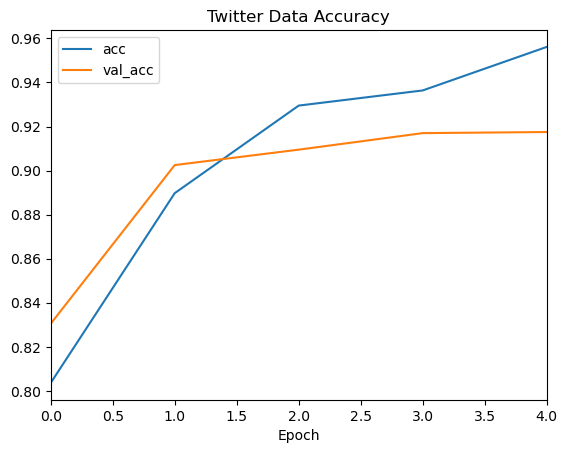

In [27]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Twitter Data Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.xlim(0,4)
plt.show()


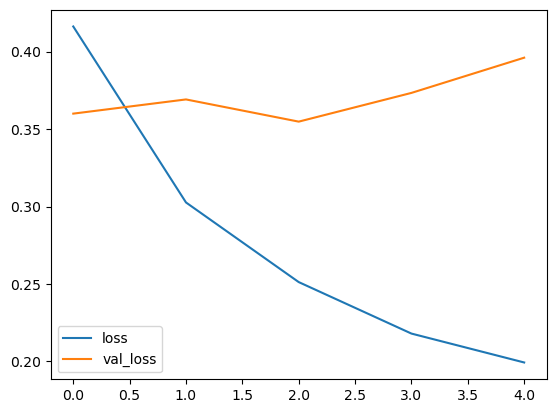

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [7]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    #print("Predicted label: ", sentiment_label[1][prediction])
    return sentiment_label[1][prediction]

In [20]:
def predict_sentiment(text, model, sentimentlabel):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentimentlabel[1][prediction])
    return sentimentlabel[1][prediction]

In [22]:
movie_sentiments = test_movie_df['text'].apply(predict_sentiment, model=model, sentimentlabel=sentiment_label)


1/1 [==============================] - 0s 76ms/step
Predicted label:  negative
1/1 [==============================] - 0s 32ms/step
Predicted label:  positive
1/1 [==============================] - 0s 26ms/step
Predicted label:  positive
1/1 [==============================] - 0s 26ms/step
Predicted label:  positive
1/1 [==============================] - 0s 20ms/step
Predicted label:  negative
1/1 [==============================] - 0s 45ms/step
Predicted label:  positive
1/1 [==============================] - 0s 45ms/step
Predicted label:  positive
1/1 [==============================] - 0s 28ms/step
Predicted label:  positive
1/1 [==============================] - 0s 23ms/step
Predicted label:  positive
1/1 [==============================] - 0s 26ms/step
Predicted label:  negative
1/1 [==============================] - 0s 31ms/step
Predicted label:  positive
1/1 [==============================] - 0s 30ms/step
Predicted label:  positive
1/1 [==============================] - 0s 20ms/step


In [23]:
#print(test_tweet_df)
print(movie_sentiments)

# newdf = test_tweet_df.merge(tweet_sentiments)
# print(newdf)

def findaccuracy(testset, generatedset): 
    diff = pd.DataFrame(testset["sentiment"].compare(generatedset, align_axis=0))
    return (testset.shape[0] - (diff.shape[0]/2)) /  testset.shape[0]
# correctposcount = 0
# for row in diff.rows(): 
#     if 

findaccuracy(test_movie_df, movie_sentiments)


# pos_precision = # num of correct positives over number of all positives
# pos_recall # num of correct positives of over number of positives we should have found

1985     negative
13532    positive
11545    positive
1283     positive
1193     negative
           ...   
905      negative
5192     positive
12172    positive
235      positive
13349    positive
Name: text, Length: 3864, dtype: object


0.9195134575569358

In [15]:
test_sentence1 = "Still waiting on bags from flight 1613/2440 yesterday  First Class passenger not happy with your service."
predict_sentiment(test_sentence1)

test_sentence2 = "So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America."
predict_sentiment(test_sentence2)

TypeError: predict_sentiment() missing 2 required positional arguments: 'model' and 'sentimentlabel'